In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='Sheet3')
df = df.fillna(value=0)
X = df[list(df.columns)[:-1]]
y = df[['cd/A']]
X.head()

,Layers,lumo_1,homo_1,t1,lumo_2,homo_2,t2,lumo_3,homo_3,t3,...,HOMO,triplet2,thick,triplet3,lumo6,homo6,t6,wf_1,t7,t8
0,8,3.3,5.2,60.0,2.0,5.5,20.0,0.0,0.0,0.0,...,6.6,2.8,25,3.36,2.80,6.20,30.0,3.5,1.5,200
1,8,0.0,0.0,0.0,2.4,5.4,35.0,2.4,5.9,5.0,...,6.6,2.8,20,2.99,2.80,6.20,30.0,3.5,0.8,80
2,8,3.3,5.2,60.0,2.0,5.5,20.0,0.0,0.0,0.0,...,6.6,2.8,25,3.36,2.80,6.20,30.0,3.5,1.5,200
3,8,0.0,0.0,0.0,2.4,5.4,35.0,2.4,5.9,5.0,...,6.6,2.8,20,2.99,2.80,6.20,30.0,3.5,0.8,80
4,7,5.7,9.5,10.0,2.0,5.5,45.0,0.0,0.0,0.0,...,5.9,2.8,20,2.75,2.73,6.68,45.0,4.3,2.0,100


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train[0:1]

,Layers,lumo_1,homo_1,t1,lumo_2,homo_2,t2,lumo_3,homo_3,t3,...,HOMO,triplet2,thick,triplet3,lumo6,homo6,t6,wf_1,t7,t8
99,9,5.7,9.5,10.0,2.5,5.2,10.0,2.4,5.7,5.0,...,5.75,2.96,20,2.75,2.73,6.68,50.0,4.3,1.0,120


In [3]:
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_test[0:1]

array([[ 0.6       ,  0.31343284,  0.53608247,  1.        ,  0.70224719,
         0.53608247,  0.26666667,  1.        ,  0.96721311,  0.5       ,
         0.95238095,  0.74901961,  0.42916667,  0.74358974,  0.18181818,
         1.        ,  0.7204611 ,  0.90666667,  0.28571429,  0.        ,
         0.4       ,  1.        ]])

In [4]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
# X_train[:1]

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))

R-squared:  0.483302222091


In [6]:
y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %s,  Actual: %s' % (prediction, y_test[i]))

Predicted: 26.08,  Actual: [17.0]
Predicted: 16.8766666667,  Actual: [19.0]
Predicted: 24.0937435897,  Actual: [43.2]
Predicted: 51.0484615385,  Actual: [54.666666666666664]
Predicted: 13.69,  Actual: [6.0]
Predicted: 18.412,  Actual: [6.5]
Predicted: 27.147025641,  Actual: [7.37]
Predicted: 25.33,  Actual: [22.5]
Predicted: 23.6578461538,  Actual: [33.9]
Predicted: 28.811,  Actual: [40.8]
Predicted: 19.9356666667,  Actual: [8.0]
Predicted: 32.1,  Actual: [37.3]
Predicted: 47.9,  Actual: [36.2]
Predicted: 14.45,  Actual: [15.9]
Predicted: 16.342,  Actual: [18.0]
Predicted: 57.3964102564,  Actual: [65.3076923076923]
Predicted: 16.6466666667,  Actual: [33.6]
Predicted: 26.86,  Actual: [25.3]
Predicted: 25.62,  Actual: [36.5]
Predicted: 19.0415897436,  Actual: [6.3]
Predicted: 12.874,  Actual: [16.01]
Predicted: 2.73,  Actual: [6.1]
Predicted: 41.05,  Actual: [34.0]
Predicted: 15.04,  Actual: [20.8]
Predicted: 19.9356666667,  Actual: [12.0]
Predicted: 12.324,  Actual: [18.6]
Predicted: 55

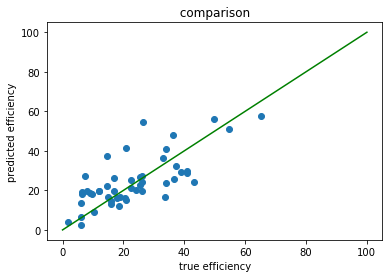

In [7]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 100], [-0,100], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' comparison ')
plt.show()

0.885012687451


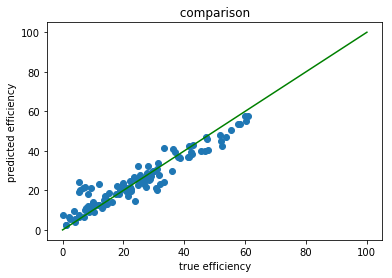

In [9]:
# see the prediction on training set
# y_predictions = regressor.predict(X_train)
# print(regressor.score(X_train, y_train))
# plt.scatter(y_train, y_predictions)
# plt.plot([0, 100], [-0,100], 'g-', label='true line')
# plt.xlabel('true efficiency')
# plt.ylabel('predicted efficiency')
# plt.title(' comparison ')
# plt.show()

In [10]:
importance = regressor.feature_importances_.tolist()
names = list(X)
# sort importance tp x sort names, huh
# importance = sorted(importance, key=abs, reverse=True)

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))


        column              importance
0       Layers              0.035394290803016384
1       lumo_1              0.007584395738688085
2       homo_1              0.015378421719408805
3       t1                  0.05754150302618481
4       lumo_2              0.03771115720602719
5       homo_2              0.022573781759334503
6       t2                  0.1482101944185873
7       lumo_3              0.0007100597733135632
8       homo_3              7.940337206024059e-05
9       t3                  0.0033564019845403006
10      triplet1            0.07096447821975586
11      LUMO                0.08675843742717267
12      HOMO                0.06921332392263098
13      triplet2            0.13010410542626138
14      thick               0.014555399162879368
15      triplet3            0.021052081077836005
16      lumo6               0.04798587270354437
17      homo6               0.05058028340239799
18      t6                  0.12617694739757518
19      wf_1                0.00540650

([<matplotlib.axis.XTick at 0x281b1a70c18>,
 <a list of 22 Text xticklabel objects>)

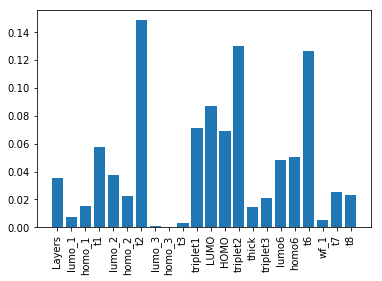

In [11]:
x = np.arange(22)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90)

In [13]:
cv_results = cross_val_score(regressor, X, y.values.ravel(), cv=4)
cv_results

array([-0.55123671,  0.06634814, -0.93742006, -0.40703139])

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

estimator = range(5, 11, 1)
parameters = {
                'n_estimators': estimator
             }

reg = GridSearchCV(regressor, parameters, verbose=1, scoring='r2', cv=4)

reg.fit(X, y.values.ravel())
print('Best score: %0.3f' % reg.best_score_)
print('Best parameters set:')
best_parameters = reg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
y_predictions = reg.predict(X_test)
print('r2 on test set:', r2_score(y_test, y_predictions))


Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best score: -0.390
Best parameters set:
	n_estimators: 8
r2 on test set: -0.316056294601


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s finished
